In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogames-sales-dataset/XboxOne_GameSales.csv
/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv
/kaggle/input/videogames-sales-dataset/PS4_GamesSales.csv


In [178]:
vgdata=pd.read_csv('../input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [179]:
vgdata.dropna(subset=['Name'],inplace=True)
vgdata.dropna(subset=['Year_of_Release'],inplace=True)
vgdata.dropna(subset=['Publisher'],inplace=True)
vgdata['Developer'].fillna('None',inplace=True)
vgdata['Rating'].fillna('None',inplace=True)

In [180]:
vgdata.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9151,Bassmasters 2000,N64,1999.0,Sports,THQ,0.11,0.03,0.00,0.0,0.14,NaN,NaN,NaN,NaN,None,None
15719,Tiny Toon Adventures: Wacky Stackers,GBA,2001.0,Puzzle,Conspiracy Entertainment,0.01,0.00,0.00,0.0,0.02,58.0,5.0,NaN,NaN,Warthog,E
11845,Hang On GP,SAT,1995.0,Racing,Sega,0.00,0.00,0.07,0.0,0.07,NaN,NaN,NaN,NaN,None,None
15921,Oshiri Kajiri Mushi no Rhythm Lesson DS: Kawai...,DS,2008.0,Misc,Sega,0.00,0.00,0.02,0.0,0.02,NaN,NaN,NaN,NaN,None,None
9725,The Ant Bully,GC,2006.0,Platform,Midway Games,0.09,0.02,0.00,0.0,0.12,51.0,8.0,NaN,NaN,Artificial Mind and Movement,E10+


In [181]:
vgdata.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

def sales(col):
    plt.clf()
    sns.distplot(vgdata[col], hist=False)
    plt.xlim(0, 3)
    plt.show()

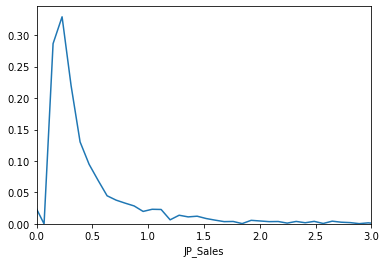

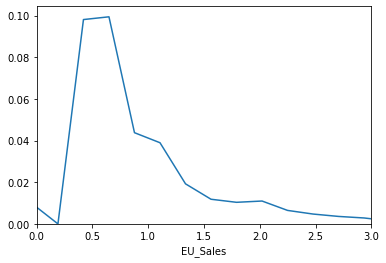

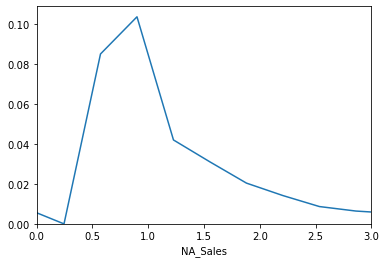

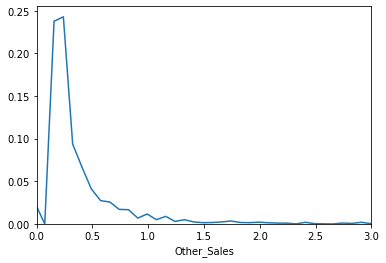

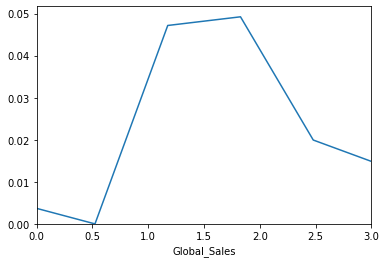

In [183]:
sales('JP_Sales')
sales('EU_Sales')
sales('NA_Sales')
sales('Other_Sales')
sales('Global_Sales')

In [184]:
vgdata[vgdata['Platform']=='X360'].sort_values('Global_Sales',ascending=False).head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,100.0,6.3,2698.0,Infinity Ward,M
44,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.81,0.13,1.21,12.12,94.0,86.0,7.8,4100.0,"Bungie Software, Bungie",M
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25,73.0,29.0,2.6,2117.0,Infinity Ward,M
64,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.04,1.95,0.08,0.79,9.86,91.0,99.0,7.9,2045.0,Bungie,M


In [185]:
#Groupby best game
#vgdata.groupby('Platform')['Global_Sales', 'Name'].sum()
vgdata.groupby(['Platform','Name'], as_index=False)['Global_Sales'].max().sort_values("Global_Sales",ascending=False)

,Platform,Name,Global_Sales
13930,Wii,Wii Sports,82.53
4649,NES,Super Mario Bros.,40.24
13320,Wii,Mario Kart Wii,35.52
13931,Wii,Wii Sports Resort,32.77
2860,GB,Pokemon Red/Pokemon Blue,31.37
...,...,...,...
2362,DS,Smiley World: Island Challenge,0.01
2360,DS,Smart Kid's Mega Game Mix,0.01
11820,PSP,XI Coliseum,0.01
10386,PS4,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,0.01


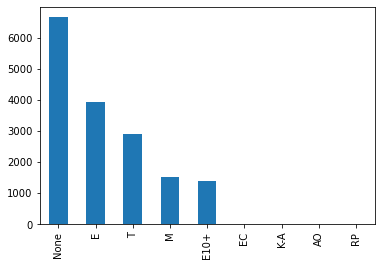

In [186]:
data=vgdata.Rating.value_counts()
data.plot(kind='bar')

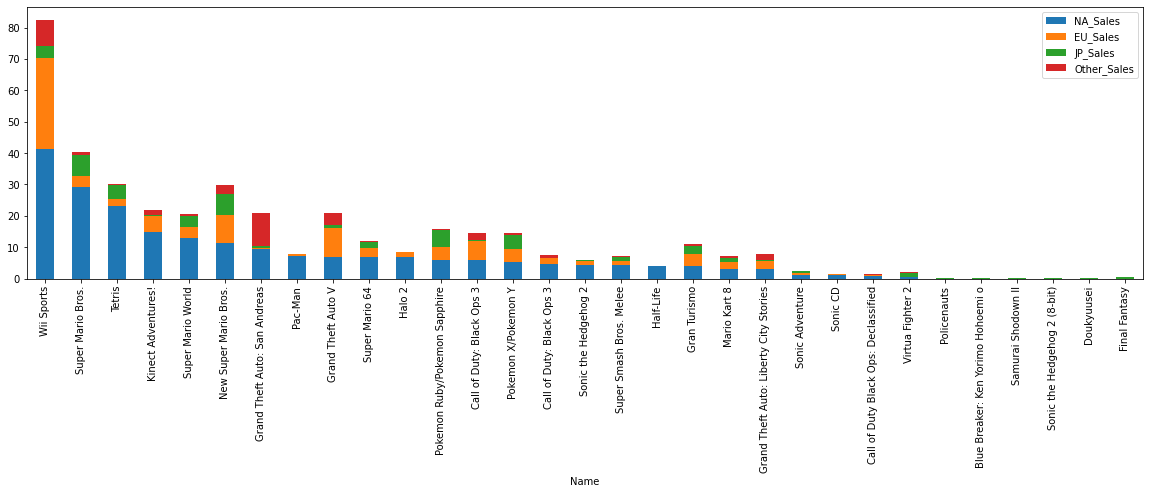

In [187]:
vgdata[['Platform','Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]\
.loc[vgdata.groupby('Platform').NA_Sales.agg('idxmax')]\
.sort_values('NA_Sales',ascending = False).set_index('Name').plot(kind='bar',stacked=True,figsize=(20,5))

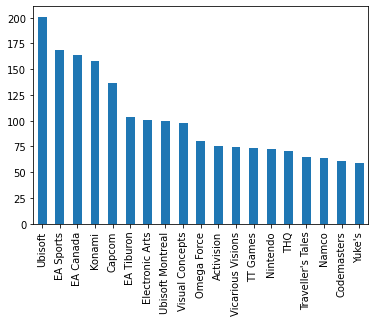

In [188]:
data=vgdata.Developer.value_counts()[1:20]
data.plot(kind='bar')

so 2007 to 2010 is the best year in gaming apparently

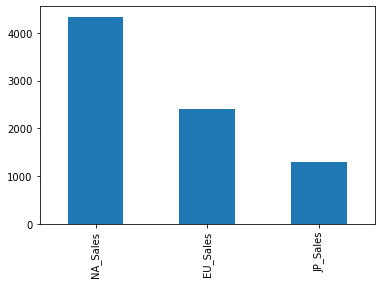

In [189]:
vgdata[['NA_Sales','EU_Sales','JP_Sales']].sum(axis=0).plot(kind='bar')

In [190]:
vgdata.Platform.value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [191]:
mean=vgdata['Global_Sales'].mean()
std=vgdata['Global_Sales'].std()
vgdata['z']=(vgdata['Global_Sales']-mean)/std
vgdata['z'].describe()

count    1.641600e+04
mean    -3.291316e-14
std      1.000000e+00
min     -3.376584e-01
25%     -3.056047e-01
50%     -2.350867e-01
75%     -4.276476e-02
max      5.256369e+01
Name: z, dtype: float64

In [192]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
vgdata['Global_Sales']=s.fit_transform(np.array(vgdata['Global_Sales']).reshape(-1,1))
vgdata.head()
vgdata.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,z
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.0,NaN,NaN,NaN,NaN,None,None,-0.337658
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.0,NaN,NaN,NaN,NaN,None,None,-0.337658
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.0,NaN,NaN,NaN,NaN,None,None,-0.337658
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.0,NaN,NaN,NaN,NaN,None,None,-0.337658
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.0,NaN,NaN,NaN,NaN,None,None,-0.337658


Animated bar chart: Global sales, genre, and year

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [194]:
anigraph=pd.DataFrame(vgdata.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum())

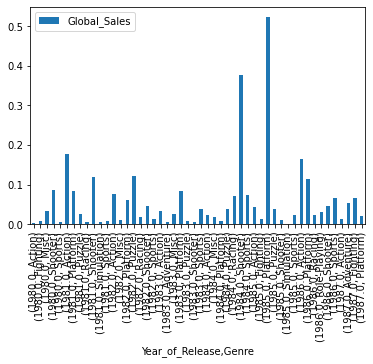

In [195]:
anigraph.head(50).plot(kind='bar')

In [196]:
genres=list(vgdata.Genre.unique())
del genres[-1]
genres

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure']

In [197]:
yor=list(vgdata.Year_of_Release.unique())
del yor[-9]
yor

[2006.0,
 1985.0,
 2008.0,
 2009.0,
 1996.0,
 1989.0,
 1984.0,
 2005.0,
 1999.0,
 2007.0,
 2010.0,
 2013.0,
 2004.0,
 1990.0,
 1988.0,
 2002.0,
 2001.0,
 2011.0,
 1998.0,
 2015.0,
 2012.0,
 2014.0,
 1992.0,
 1997.0,
 1993.0,
 1994.0,
 1982.0,
 2016.0,
 2003.0,
 1986.0,
 1995.0,
 1991.0,
 1981.0,
 1987.0,
 1980.0,
 1983.0,
 2020.0,
 2017.0]

**THE QUESTION**
What are the NA_Sales for a game before it is released in the United States?

We are predicting NA_SALES using Platform, Y_O_R(Maybe), Genre, Publisher(Maybe), Developer, Rating

In [198]:
vgdata.shape

(16416, 17)

In [199]:
print("There are {} rows and {} columns in the dataset".format(vgdata.shape[0],vgdata.shape[1]))

There are 16416 rows and 17 columns in the dataset


In [200]:
vgdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,z
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,1.000000,76.0,51.0,8.0,322.0,Nintendo,E,52.563691
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,0.487518,NaN,NaN,NaN,NaN,None,None,25.452711
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,0.430320,82.0,73.0,8.3,709.0,Nintendo,E,22.426846
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,0.396995,80.0,73.0,8.0,192.0,Nintendo,E,20.663895
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,0.380029,NaN,NaN,NaN,NaN,None,None,19.766393


In [201]:
vgdata.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
z                  float64
dtype: object

continuous
------------------------
NA_SALES(float) 

categorical
------------------------
Platform(string) 
Y_O_R(float)(Maybe) 
Genre(string) 
Publisher(string)(Maybe)
Developer(string)
Rating(string)

In [202]:
vgdata.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer             0
Rating                0
z                     0
dtype: int64

In [203]:
vgdata.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,z
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000,1.641600e+04
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.006383,68.997119,26.440992,7.126900,163.008846,-3.291316e-14
std,5.881148,0.819028,0.507134,0.311348,0.188156,0.018903,13.918755,19.009305,1.498886,563.932422,1.000000e+00
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000,-3.376584e-01
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000606,60.000000,12.000000,6.400000,10.000000,-3.056047e-01
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.001939,71.000000,22.000000,7.500000,24.000000,-2.350867e-01
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.005574,79.000000,36.000000,8.200000,81.000000,-4.276476e-02
max,2020.000000,41.360000,28.960000,10.220000,10.570000,1.000000,98.000000,113.000000,9.700000,10665.000000,5.256369e+01


In [204]:
print('Missing Values %')
print("-"*25)
print(round(vgdata.isnull().sum()/vgdata.shape[0]*100,2))

Missing Values %
-------------------------
Name                0.00
Platform            0.00
Year_of_Release     0.00
Genre               0.00
Publisher           0.00
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.38
Critic_Count       51.38
User_Score         54.55
User_Count         54.55
Developer           0.00
Rating              0.00
z                   0.00
dtype: float64


In [205]:
#Sorting
vgdata.sort_values('NA_Sales',ascending=False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,z
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,1.000000,76.0,51.0,8.0,322.0,Nintendo,E,52.563691
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,0.487518,NaN,NaN,NaN,NaN,None,None,25.452711
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,0.342947,NaN,NaN,NaN,NaN,None,None,17.804710
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,0.366578,NaN,NaN,NaN,NaN,None,None,19.054802
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,0.430320,82.0,73.0,8.3,709.0,Nintendo,E,22.426846


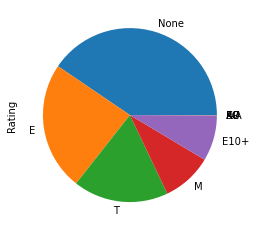

In [206]:
data=vgdata.Rating.value_counts()
data.plot(kind='pie')

E rating has the most games, followed by T.

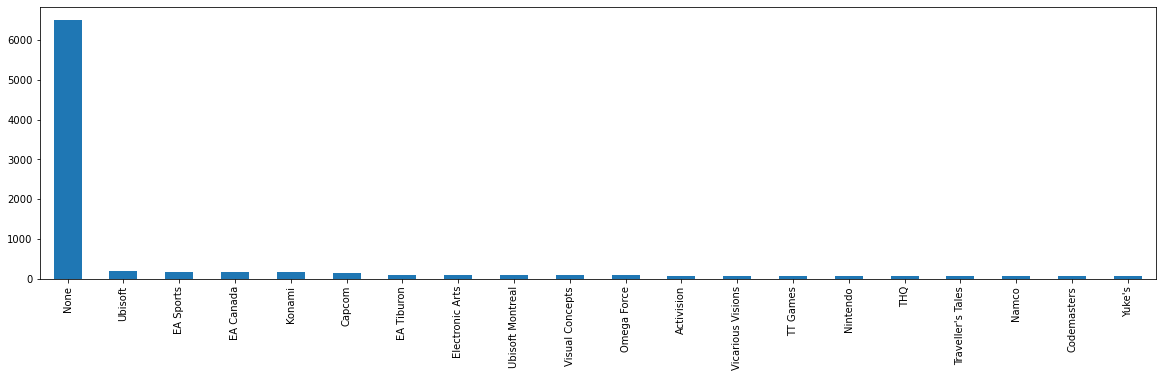

In [207]:
data=vgdata.Developer.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

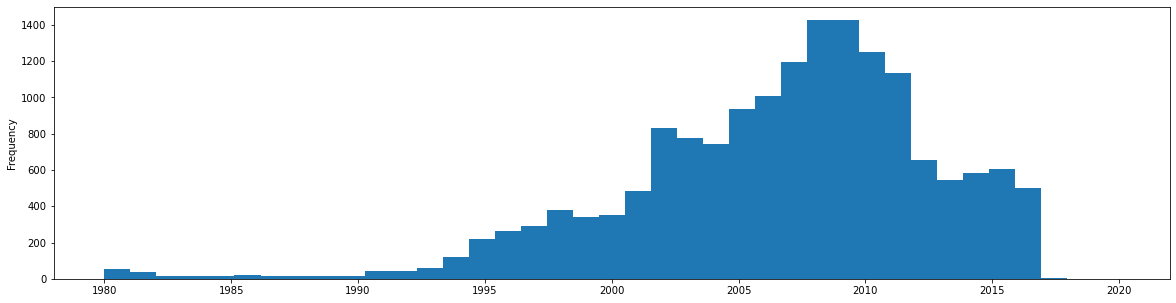

In [208]:
data=vgdata.Year_of_Release
data.plot.hist(by='Year_of_Release',bins=39,figsize=(20,5))

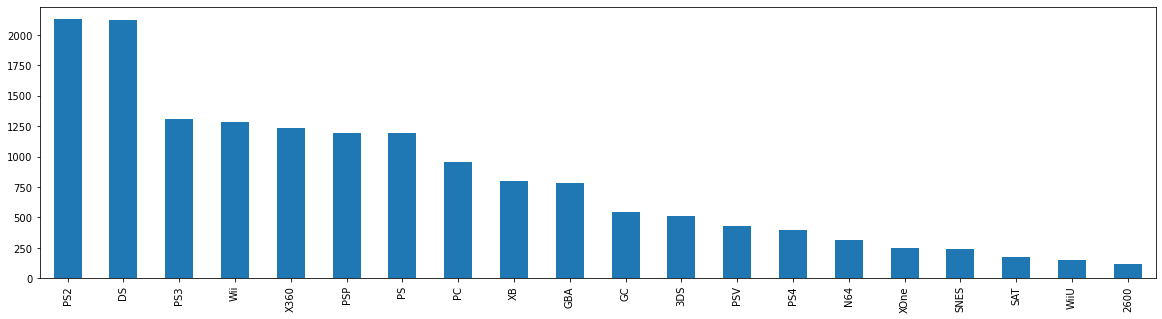

In [209]:
data=vgdata.Platform.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

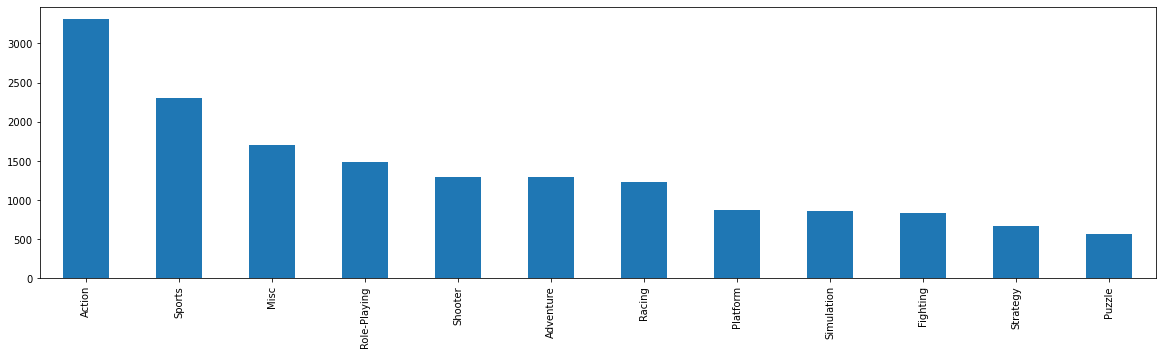

In [210]:
data=vgdata.Genre.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

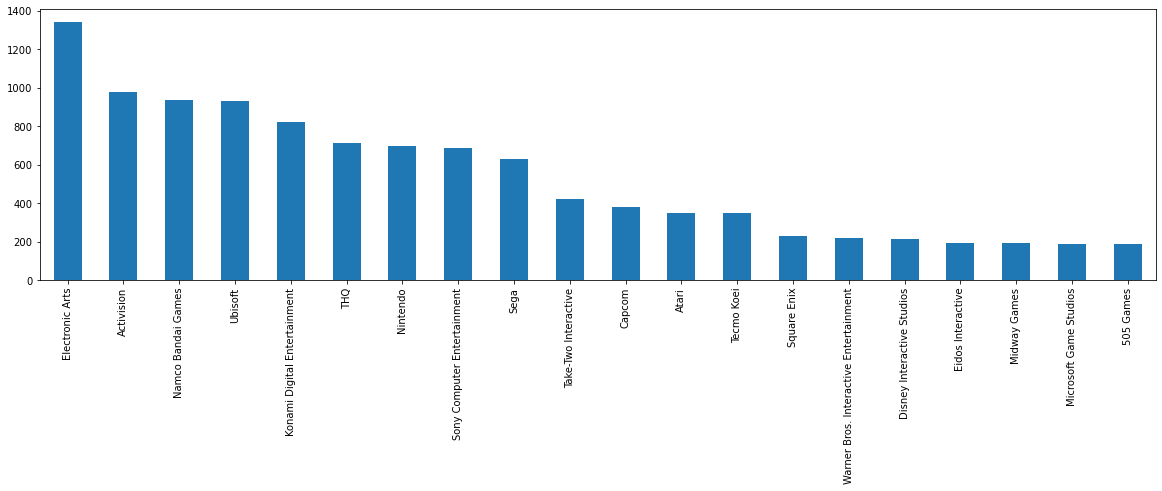

In [211]:
data=vgdata.Publisher.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

(1.0, -1.0)

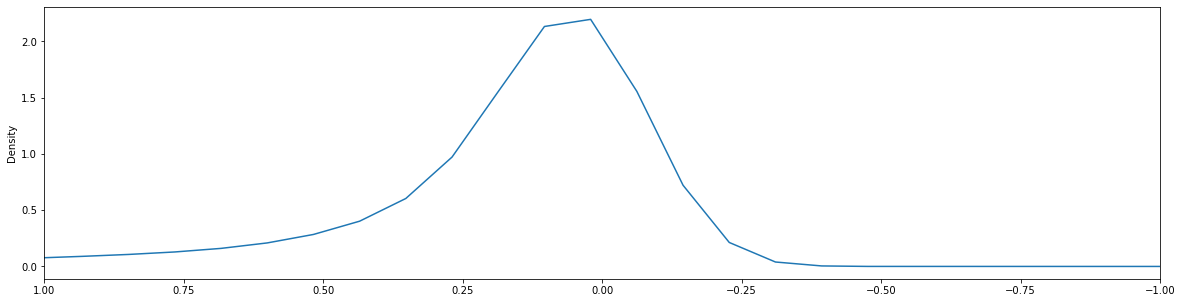

In [212]:
vgdata['NA_Sales'].plot(kind='kde',figsize=(20,5))
plt.xlim({1,-1})

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


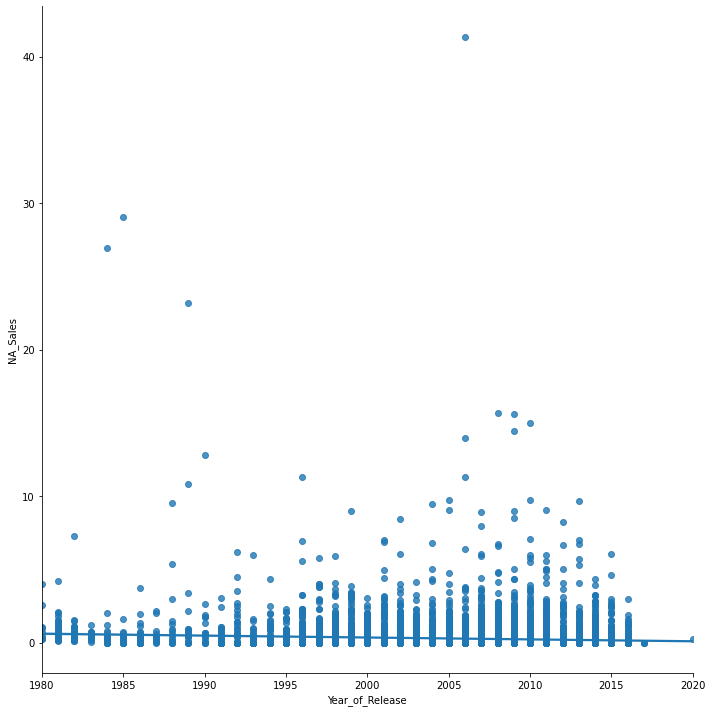

In [213]:
sns.lmplot(x='Year_of_Release',y='NA_Sales',data=vgdata,size=10)

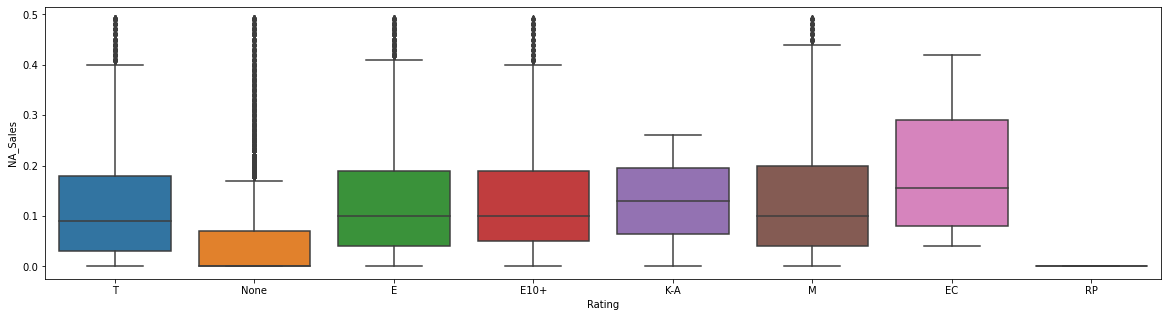

In [214]:
import matplotlib.pyplot as plt
nicedata=vgdata[vgdata['NA_Sales']<0.5]
nicedata=nicedata[nicedata['NA_Sales']>-0.5]
fig=plt.gcf()
sns.boxplot(x='Rating',y='NA_Sales',data=nicedata)
fig.set_size_inches(20, 5)

In [215]:
#CLEAN DATASET
#Remove or replace NULL VALUES
#One-Hot Encode/Label Encode Categorical columns

In [216]:
vgdata.drop(["Critic_Score","Critic_Count","User_Score","User_Count","Global_Sales",'JP_Sales',"EU_Sales","Other_Sales"],
            axis=1,inplace=True)

In [217]:
vgdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating,z
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,Nintendo,E,52.563691
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,None,None,25.452711
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E,22.426846
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E,20.663895
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,None,None,19.766393


In [218]:
vgdata.dropna(subset=['Name'],inplace=True)
vgdata.dropna(subset=['Year_of_Release'],inplace=True)
vgdata.dropna(subset=['Publisher'],inplace=True)
vgdata['Developer'].fillna('None',inplace=True)
vgdata['Rating'].fillna('None',inplace=True)

In [219]:
vgdata.isnull().any()

Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher          False
NA_Sales           False
Developer          False
Rating             False
z                  False
dtype: bool

In [220]:
columns=['Platform','Year_of_Release','Genre','Publisher','Developer','Rating']
for i in columns:
    print(i)
    print("_"*20)
    print(vgdata[i].nunique())
    print('\n')
    
from sklearn.preprocessing import LabelEncoder

Platform
____________________
31


Year_of_Release
____________________
39


Genre
____________________
12


Publisher
____________________
580


Developer
____________________
1681


Rating
____________________
9




In [221]:
#OHE Genre & Rating
#LABEL ENCODE everything else

vgdata=pd.concat([vgdata,pd.get_dummies(vgdata.Rating)],axis=1)
vgdata=pd.concat([vgdata,pd.get_dummies(vgdata.Genre)],axis=1)
vgdata.drop(['Genre','Rating'],axis=1,inplace=True)

In [222]:
Dev_LE=LabelEncoder()
vgdata.Developer=Dev_LE.fit_transform(vgdata.Developer)

Pub_LE=LabelEncoder()
vgdata.Publisher=Pub_LE.fit_transform(vgdata.Publisher)

YOR_LE=LabelEncoder()
vgdata.Year_of_Release=YOR_LE.fit_transform(vgdata.Year_of_Release)

Plat_LE=LabelEncoder()
vgdata.iloc[:,1]=Plat_LE.fit_transform(vgdata.iloc[:,1])

vgdata.rename(columns={vgdata.columns[1]:'System'}, inplace=True)
vgdata.head()

,Name,System,Year_of_Release,Publisher,NA_Sales,Developer,z,AO,E,E10+,...,Fighting,Misc,System,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,26,26,361,41.36,1008,52.563691,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,11,5,361,29.08,1027,25.452711,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,26,28,361,15.68,1008,22.426846,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,26,29,361,15.61,1008,20.663895,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,5,16,361,11.27,1027,19.766393,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [223]:
Y=vgdata['NA_Sales']
X=vgdata
X.drop(['NA_Sales'],axis=1,inplace=True)

In [ ]:
X.head()